# RiverCast

## Import Libraries and Dataset

In [342]:
# import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [343]:
# import dataset
df = pd.read_csv('dataset.csv')
df.dropna(inplace=True)
df.head(10)

,Station,Year,Month,Day,Hour,Waterlevel,Station.1,Year.1,Month.1,Day.1,...,RF-Intensity.1,Humidity,Precipitation,Temperature,Temperature.1,Humidity.1,Precipitation.1,Temperature.2,Humidity.2,Precipitation.2
0,NANGKA,2012,January,1,1,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
1,NANGKA,2012,January,1,2,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
2,NANGKA,2012,January,1,3,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
3,NANGKA,2012,January,1,4,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
4,NANGKA,2012,January,1,5,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
5,NANGKA,2012,January,1,6,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
6,NANGKA,2012,January,1,7,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
7,NANGKA,2012,January,1,8,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
8,NANGKA,2012,January,1,9,15.86,STO.NINO,2012,January,1,...,0.0,17.64,0.01,26.20,26.20,17.64,0.01,26.20,17.64,0.01
9,NANGKA,2012,January,1,10,15.86,STO.NINO,2012,January,1,...,0.0,17.27,0.02,27.55,27.55,17.27,0.02,27.55,17.27,0.02


In [344]:
# remove non numeric fields
df = df[['Waterlevel', 'Waterlevel.2', 'Waterlevel.3', 'RF-Intensity', 'RF-Intensity.1', 'Temperature', 'Temperature.1',  'Temperature.2', 'Humidity', 'Humidity.1', 'Humidity.2', 'Precipitation', 'Precipitation.1', 'Precipitation.2']]
df = df.astype(np.float64)  # make sure that all data are float type
df.head(10)

,Waterlevel,Waterlevel.2,Waterlevel.3,RF-Intensity,RF-Intensity.1,Temperature,Temperature.1,Temperature.2,Humidity,Humidity.1,Humidity.2,Precipitation,Precipitation.1,Precipitation.2
0,15.86,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
1,15.86,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
2,15.86,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
3,15.86,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
4,15.86,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
5,15.86,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
6,15.86,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
7,15.86,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
8,15.86,12.53,21.97,0.0,0.0,26.20,26.20,26.20,17.64,17.64,17.64,0.01,0.01,0.01
9,15.86,12.53,21.97,0.0,0.0,27.55,27.55,27.55,17.27,17.27,17.27,0.02,0.02,0.02


## Clean Dataset

### Remove Dataset Outliers

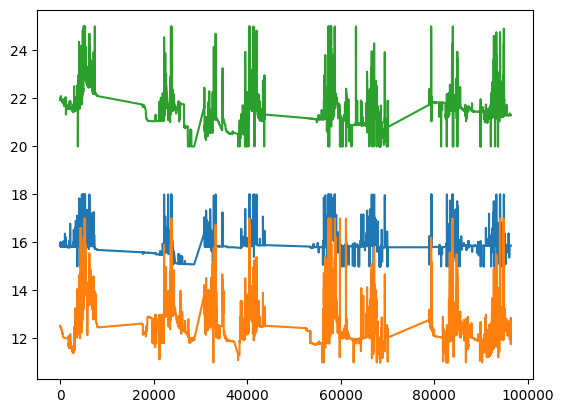

In [345]:
# remove water data outliers
df['Waterlevel'] = df['Waterlevel'].clip(upper=18, lower=15, axis=0)
df['Waterlevel.2'] = df['Waterlevel.2'].clip(upper=17, lower=11, axis=0)
df['Waterlevel.3'] = df['Waterlevel.3'].clip(upper=25, lower=20, axis=0)

water_data = df[['Waterlevel', 'Waterlevel.2', 'Waterlevel.3']]
plt.plot(water_data)

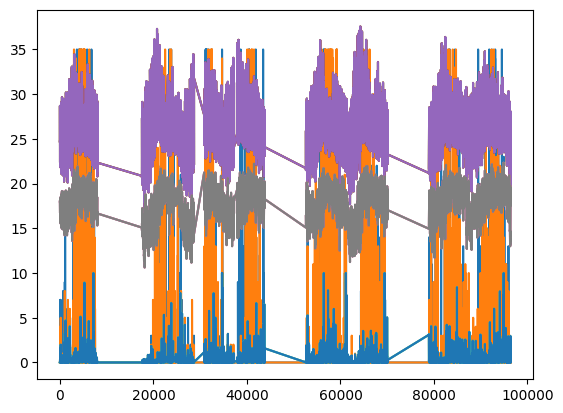

In [346]:
# remove weather data outliers
df['RF-Intensity'] = df['RF-Intensity'].clip(upper=35, lower=0, axis=0)
df['RF-Intensity.1'] = df['RF-Intensity.1'].clip(upper=35, lower=0, axis=0)
df[['Precipitation', 'Precipitation.1', 'Precipitation.2']] = df[['Precipitation', 'Precipitation.1', 'Precipitation.2']].clip(upper=10, lower=0, axis=0)

weather_data = df[['RF-Intensity', 'RF-Intensity.1', 'Temperature', 'Temperature.1',  'Temperature.2', 'Humidity', 'Humidity.1', 'Humidity.2', 'Precipitation', 'Precipitation.1', 'Precipitation.2']]
plt.plot(weather_data)

In [347]:
# make time series stationary
df = df.diff()
df = df.drop(index=0)
df.shape

(59656, 14)

In [348]:
# smoothen time-series using moving average
df = df.rolling(window=72).mean()
df.dropna(inplace=True)
df.shape

(59585, 14)

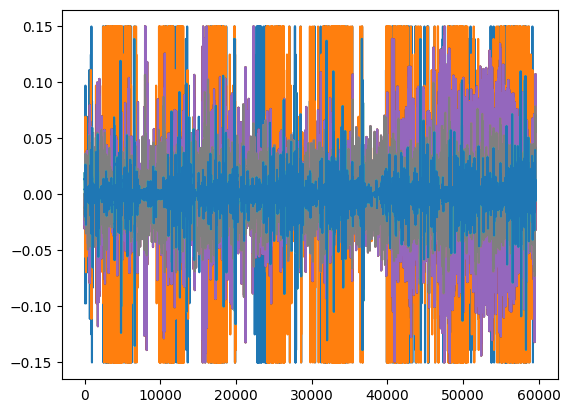

In [349]:
# plot weather data
weather_data = df[['RF-Intensity', 'RF-Intensity.1', 'Temperature', 'Temperature.1',  'Temperature.2', 'Humidity', 'Humidity.1', 'Humidity.2', 'Precipitation', 'Precipitation.1', 'Precipitation.2']]
weather_data = weather_data.clip(upper=0.15, lower=-0.15, axis=0)
weather_data = weather_data.to_numpy()
plt.plot(weather_data)

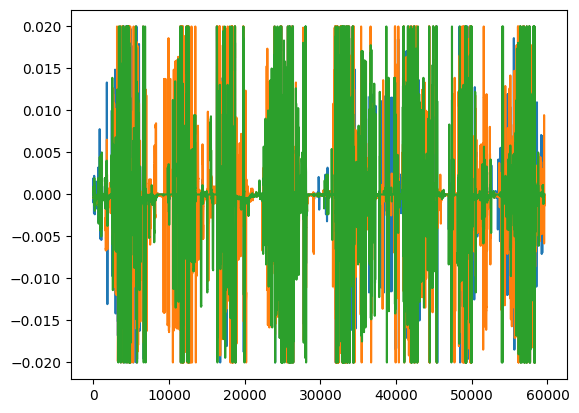

In [350]:
# plot water data
water_data = df[['Waterlevel', 'Waterlevel.2', 'Waterlevel.3']]
water_data = water_data.clip(upper=0.02, lower=-0.02, axis=0)
water_data = water_data.to_numpy()
plt.plot(water_data)

## Principal Component Analysis

In [351]:
dataset = np.hstack((weather_data, water_data))
dataset.shape

(59585, 14)

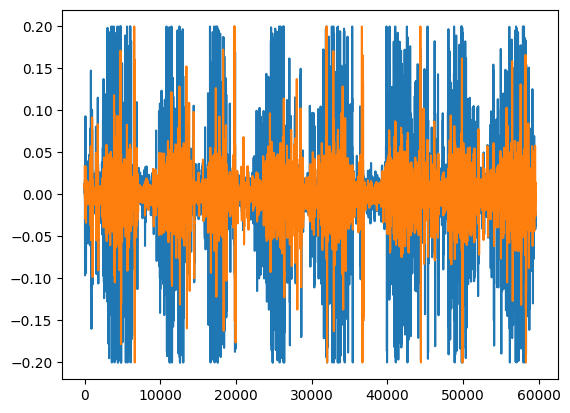

In [352]:
# compute covariance matrix
cov_matrix = np.cov(dataset, ddof=0, rowvar=False)

# compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
order_of_importance = np.argsort(eigenvalues)[::-1] 

# sort eigenvalues and eigenvectors
sorted_eigenvalues = eigenvalues[order_of_importance].real
sorted_eigenvectors = eigenvectors[:,order_of_importance].real

k = 4  # number of features to preserve
dataset = np.matmul(dataset, sorted_eigenvectors[:,:k]) # transform the original data
dataset = dataset[:, 2:]
dataset = np.clip(dataset, -0.20, 0.20)
plt.plot(dataset)

## Normalize Dataset

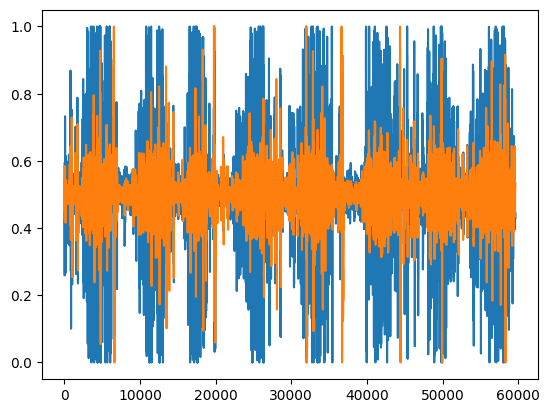

In [353]:
# normalize input data
input_scaler = MinMaxScaler()
dataset = input_scaler.fit_transform(dataset)
plt.plot(dataset)

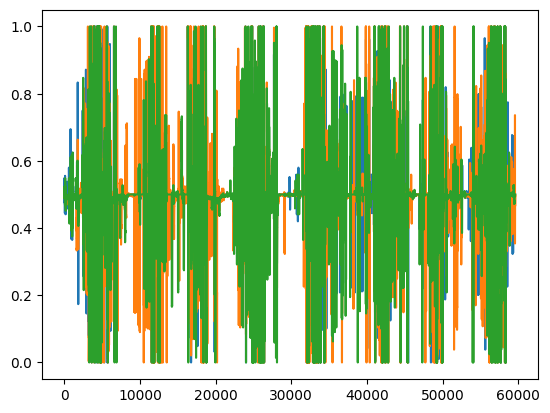

In [354]:
# normalize input data
label_scaler = MinMaxScaler()
labels = label_scaler.fit_transform(water_data)
plt.plot(labels)

In [355]:
dataset.shape[0] == labels.shape[0]

True

## Prepare Batches

In [356]:
# move data markers so the model can learn how to forecast
dataset = dataset[:-24]
labels = labels[24:]

dataset.shape[0] == labels.shape[0]

True

In [357]:
# combine dataset
dataset = np.hstack((dataset, labels))
dataset.shape

(59561, 5)

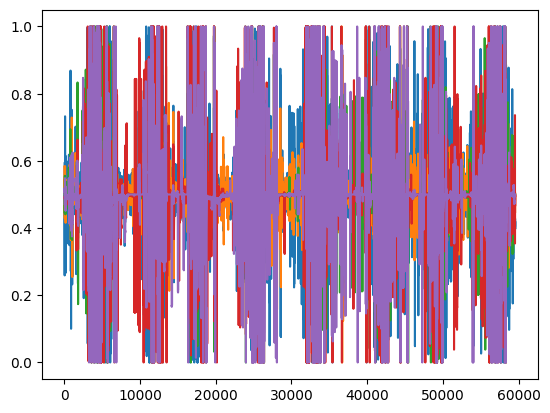

In [358]:
plt.plot(dataset)

In [359]:
windows = np.reshape(dataset[:59544], (-1, 24, 5))
windows.shape

(2481, 24, 5)

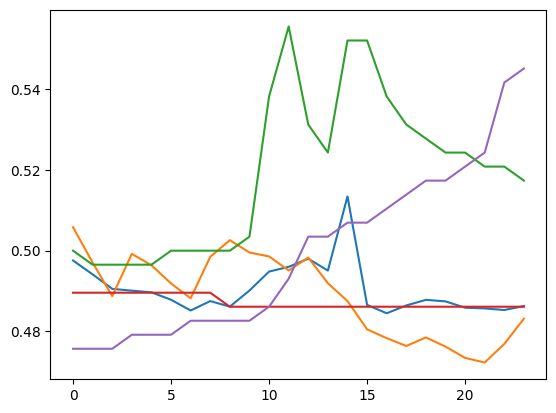

In [360]:
plt.plot(windows[3])

In [361]:
# split dataset
train_data = windows[:1736]
val_data = windows[1736:2108]
test_data = windows[2108:]

print(train_data.shape)
print(val_data.shape)
print(test_data.shape)

(1736, 24, 5)
(372, 24, 5)
(373, 24, 5)


In [362]:
# convert them into tf constants
train_tensors = tf.constant(train_data, dtype=tf.float32)
val_tensors = tf.constant(val_data, dtype=tf.float32)
test_tensors = tf.constant(test_data, dtype=tf.float32)

print(train_tensors.shape)
print(val_tensors.shape)
print(test_tensors.shape)

(1736, 24, 5)
(372, 24, 5)
(373, 24, 5)


In [363]:
BATCH_SIZE = 256
def prepare_batch(data):
    inputs = data[:, :, :2]  # Drop the [END] tokens
    labels = data[:, :, 2:]   # Drop the [START] tokens

    return inputs, labels

def make_batches(ds, batch_size=BATCH_SIZE):
      return (ds.batch(batch_size)
                .map(prepare_batch, tf.data.AUTOTUNE)
                .prefetch(buffer_size=tf.data.AUTOTUNE))
      
train_batches = make_batches(tf.data.Dataset.from_tensor_slices(train_tensors))
val_batches = make_batches(tf.data.Dataset.from_tensor_slices(val_tensors))
test_batches = make_batches(tf.data.Dataset.from_tensor_slices(test_tensors))

In [364]:
for inputs, labels in test_batches.take(1):
    break

print(inputs.shape)
print(labels.shape)

(256, 24, 2)
(256, 24, 3)


## Build the Model

### Positional Encoding

In [365]:
def positional_encoding(length, depth):
    depth = depth / 2

    positions = np.arange(length)[:, np.newaxis]     # (seq, 1)
    depths = np.arange(depth)[np.newaxis, :] / depth   # (1, depth)

    angle_rates = 1 / (10000**depths)         # (1, depth)
    angle_rads = positions * angle_rates      # (pos, depth)

    pos_encoding = np.concatenate([np.sin(angle_rads), np.cos(angle_rads)], axis=-1) 

    return tf.cast(pos_encoding, dtype=tf.float32)


class PositionalEmbedding(tf.keras.layers.Layer):
    def __init__(self, d_model):
        super().__init__()
        self.d_model = d_model
        self.pos_encoding = positional_encoding(length=1024, depth=d_model)

    def call(self, x):
        length = tf.shape(x)[1]
        # This factor sets the relative scale of the embedding and positional_encoding.
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x = x + self.pos_encoding[tf.newaxis, :length, :]
        return x

### Self-Attention Layers

In [366]:
class BaseAttention(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__()
        self.mha = tf.keras.layers.MultiHeadAttention(**kwargs)
        self.layernorm = tf.keras.layers.LayerNormalization()
        self.add = tf.keras.layers.Add()
    
class CausalSelfAttention(BaseAttention):
    def call(self, x):
        attn_output = self.mha(
            query=x,
            value=x,
            key=x,
            use_causal_mask=True)
        
        x = self.add([x, attn_output])
        x = self.layernorm(x)
        return x
    
# layer test
casual_attn = CausalSelfAttention(num_heads=1, key_dim=2, dropout=0.1)
attn_scores = casual_attn(inputs)
print(attn_scores.shape)

(256, 24, 2)


### Feed Forward Layer

In [367]:
class FeedForward(tf.keras.layers.Layer):
    def __init__(self, d_model, dff, dropout_rate=0.1):
        super().__init__()
        self.seq = tf.keras.Sequential([
            tf.keras.layers.Dense(dff, activation='relu'),
            tf.keras.layers.Dense(d_model),
            tf.keras.layers.Dropout(dropout_rate)
        ])
        self.add = tf.keras.layers.Add()
        self.layer_norm = tf.keras.layers.LayerNormalization()

    def call(self, x):
        x = self.add([x, self.seq(x)])
        x = self.layer_norm(x) 
        return x
    
# layer test
feed_forward = FeedForward(d_model=2, dff=512)
output = feed_forward(inputs)
output.shape

TensorShape([256, 24, 2])

### Decoder

In [368]:

class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, *, d_model, dff, dropout_rate=0.1):
        super(DecoderLayer, self).__init__()
        self.pos_embedding = PositionalEmbedding(d_model=d_model)
        
        self.causal_self_attention = CausalSelfAttention(
            num_heads=1,
            key_dim=d_model,
            dropout=dropout_rate)
        
        self.ffn = FeedForward(d_model, dff)

    def call(self, x):
        x = self.causal_self_attention(x=x)
        x = self.pos_embedding(x)
        x = self.ffn(x)
        return x
    
class Decoder(tf.keras.layers.Layer):
    def __init__(self, *, num_layers, dff, d_model=2, dropout_rate=0.1):
        super(Decoder, self).__init__()
        self.d_model = d_model
        self.num_layers = num_layers
        
        
        self.dec_layers = [DecoderLayer(d_model=d_model, dff=dff, dropout_rate=dropout_rate) for _ in range(num_layers)]
        self.last_attn_scores = None

    def call(self, x):
        for i in range(self.num_layers):
            x  = self.dec_layers[i](x)

        # The shape of x is (batch_size, target_seq_len, d_model).
        return x

# layer test
decoder = Decoder(num_layers=1, dff=512)
output = decoder(inputs)
output.shape

TensorShape([256, 24, 2])

### Transformer Model

In [369]:
class Transformer(tf.keras.Model):
    def __init__(self, *, num_layers, dff, target_output_size, dropout_rate=0.1):
        super().__init__()
        self.decoder = Decoder(num_layers=num_layers, dff=dff, dropout_rate=dropout_rate)
        self.final_layer = tf.keras.layers.Dense(target_output_size, activation='sigmoid')

    def call(self, x):
        x = self.decoder(x)  # (batch_size, target_len, d_model)
        pred = self.final_layer(x)  # Final linear layer output.

        try:
            # Drop the keras mask, so it doesn't scale the losses/metrics.
            # b/250038731
            del pred._keras_mask
        except AttributeError:
            pass

        # Return the final output and the attention weights.
        return pred

## Compile and Train Model

In [370]:
transformer = Transformer(num_layers=1, dff=1024, target_output_size=3)

output = transformer(inputs)
output.shape

TensorShape([256, 24, 3])

In [371]:
transformer.compile(
    loss=tf.keras.losses.MeanAbsoluteError(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.MeanAbsoluteError()])

transformer.summary()

Model: "transformer_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 decoder_7 (Decoder)         multiple                  5154      
                                                                 
 dense_45 (Dense)            multiple                  9         
                                                                 
Total params: 5163 (20.17 KB)
Trainable params: 5163 (20.17 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [372]:
checkpoint_path = "train_tf_v4_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=1)
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=3)

transformer.fit(train_batches, epochs=100, validation_data=val_batches, callbacks=[es_callback, cp_callback])

Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 0.2101 - mean_absolute_error: 0.2101
Epoch 1: saving model to train_tf_v4_1\cp.ckpt
7/7 [==============================] - 4s 194ms/step - loss: 0.2101 - mean_absolute_error: 0.2101 - val_loss: 0.2076 - val_mean_absolute_error: 0.2076
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 0.2042 - mean_absolute_error: 0.2042
Epoch 2: saving model to train_tf_v4_1\cp.ckpt
7/7 [==============================] - 1s 117ms/step - loss: 0.2042 - mean_absolute_error: 0.2042 - val_loss: 0.2016 - val_mean_absolute_error: 0.2016
Epoch 3/100
7/7 [==============================] - ETA: 0s - loss: 0.1931 - mean_absolute_error: 0.1931
Epoch 3: saving model to train_tf_v4_1\cp.ckpt
7/7 [==============================] - 1s 115ms/step - loss: 0.1931 - mean_absolute_error: 0.1931 - val_loss: 0.1899 - val_mean_absolute_error: 0.1899
Epoch 4/100
7/7 [==============================] - ETA: 0s - loss: 0.1651 - mean_absolute_erro

## Test the Model

In [373]:
def make_predictions(index):
    input_array = inputs[index:(index+1)]
    label_array = labels[index:(index+1)]
    prediction = transformer(input_array, training=False)

    plt.plot(label_scaler.inverse_transform(prediction[0]))

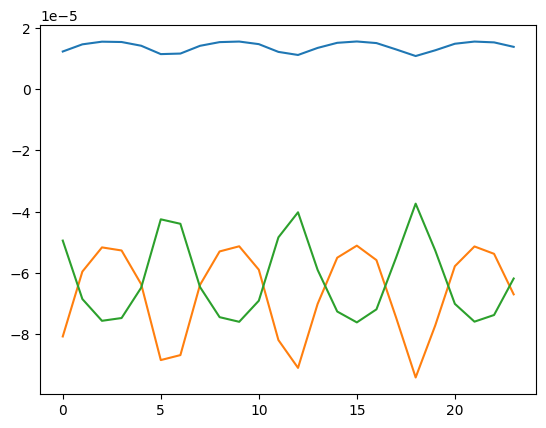

In [374]:
make_predictions(18)

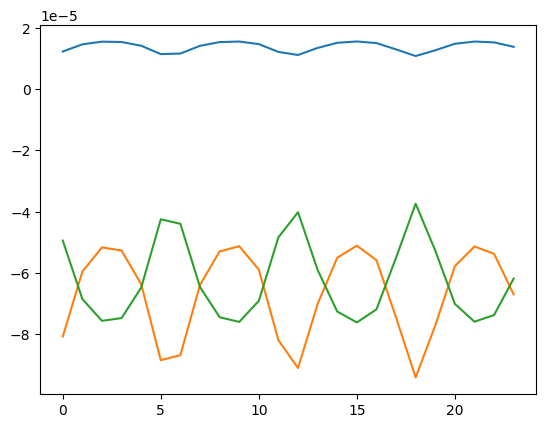

In [375]:
make_predictions(35)

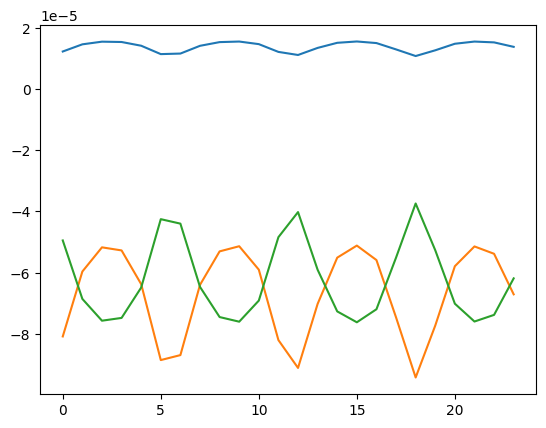

In [376]:
make_predictions(50)

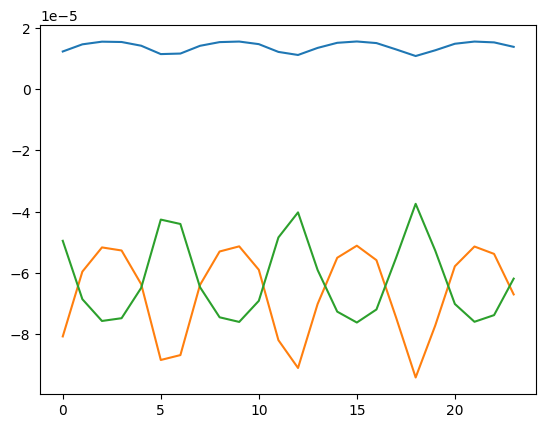

In [377]:
make_predictions(100)

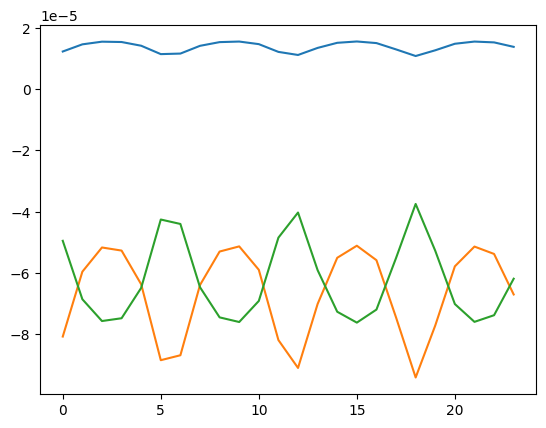

In [378]:
make_predictions(120)